In [1]:
import requests
from bs4 import BeautifulSoup as bs, Tag
import re
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_stock_market_capitalization'
page = requests.get(url)
response = requests.get(url)
html = response.text
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")


In [3]:
table = soup.find_all('table')[0]


In [4]:
 #Initialize a list to hold the headers
final_headers = []

# Assuming `table` is the BeautifulSoup object containing the <table> element

# Get the first row in the <thead> section (usually the first <tr>)
first_row = table.find_all('tr')[0]

# Get the second row for subcolumns (detailed headers)
second_row = table.find_all('tr')[1]

# Lists to store headers and subheaders
main_headers = []
subheaders = []

# Process the first row for main headers
for cell in first_row.find_all('th'):
    # Remove <sup> tags and their content
    for sup in cell.find_all('sup'):
        sup.decompose()
    # Get the text content, replacing <br/> with a space
    text = cell.get_text(separator=' ', strip=True).replace('\xa0', ' ')
    # Determine the number of columns this header spans (colspan)
    colspan = int(cell.get('colspan', 1))
    # Add the main header text to the list for the number of columns it spans
    main_headers.extend([text] * colspan)

# Process the second row for subheaders
for cell in second_row.find_all('th'):
    # Remove <sup> tags and their content
    for sup in cell.find_all('sup'):
        sup.decompose()
    # Get the text content, replacing <br/> with a space
    text = cell.get_text(separator=' ', strip=True).replace('\xa0', ' ')
    subheaders.append(text)

# Combine main headers with corresponding subheaders
final_headers = []
subheader_index = 0

for header in main_headers:
    # If we are still within the subheaders range, we add the subheaders
    if subheader_index < len(subheaders):
        if "Total market cap" in header:
            final_headers.append(f'{header}: {subheaders[subheader_index]}')
            subheader_index += 1
        else:
            final_headers.append(header)
    else:
        final_headers.append(header)

# Display the final headers with tab separation
print("\t".join(final_headers))

Country / Territory	Total market cap: (in millions of US$)	Total market cap: (as a % of GDP)	Number of domestic companies listed	Year


In [5]:
df = pd.DataFrame(columns = final_headers)
df

,Country / Territory,Total market cap: (in millions of US$),Total market cap: (as a % of GDP),Number of domestic companies listed,Year


In [6]:
column_data = table.find_all('tr')



In [7]:
# Function to clean citations (numbers in brackets)
def clean_citations(text):
    return re.sub(r'\[\d+\]', '', text)  # Remove all citations like [5], [6], etc.

# List to store cleaned data
cleaned_data = []

# Iterate through each row in column_data
for row in column_data:
    if row:  # Ensure row is not None
        print(f"Processing row: {row}")  # Debugging: See the row content
        
        # Check if row is a BeautifulSoup object or HTML string
        if isinstance(row, str):
            # Directly pass the HTML string to BeautifulSoup
            table = bs(row, 'html.parser')
        elif isinstance(row, Tag):  # Now correctly use Tag from BeautifulSoup
            # If row is already a BeautifulSoup element, extract its HTML string
            table = row
        
        # Now process the table for <td> elements
        row_data = [clean_citations(cell.text.strip()) for cell in table.find_all('td')]
        cleaned_data.append(row_data)

    else:
        print("Encountered an empty row.")   

Processing row: <tr>
<th rowspan="2">Country / Territory
</th>
<th colspan="2">Total market cap
</th>
<th rowspan="2">Number of<br/>domestic<br/>companies<br/>listed
</th>
<th rowspan="2">Year
</th></tr>
Processing row: <tr>
<th>(in millions<br/>of US$)
</th>
<th>(as a %<br/>of GDP)
</th></tr>
Processing row: <tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="39" data-file-width="69" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Flag_of_the_United_States_%2823px%29.png/40px-Flag_of_the_United_States_%2823px%29.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Flag_of_the_United_States_%2823px%29.png/60px-Flag_of_the_United_States_%2823px%29.png 2x" width="23"/></span></span> </span><a href="/wiki/United_States" title="United States">United States</a>
</td>
<td>56,549,774
</td>
<td>206.7
</td>
<td>4,642
</td>
<td>2025
</td></tr>
Processing row: <

In [8]:

#Iterate through cleaned data (excluding the first two rows)
for row in cleaned_data[2:]:
    # Since each row is already a list, just strip any leading/trailing spaces if necessary
    individual_row_data = [data.strip() for data in row]  # Strip each element in the row

    # Add the row to the DataFrame
    df.loc[len(df)] = individual_row_data

# Output the DataFrame
print(df)

    Country / Territory Total market cap: (in millions of US$)  \
0         United States                             56,549,774   
1                 China                             14,411,090   
2                 Japan                              5,504,375   
3             Hong Kong                              5,463,067   
4                 India                              5,063,221   
..                  ...                                    ...   
101            Paraguay                                    313   
102             Uruguay                                    284   
103             Armenia                                    253   
104            Eswatini                                    234   
105             Bermuda                                    207   

    Total market cap: (as a % of GDP) Number of domestic companies listed  \
0                               206.7                               4,642   
1                                65.1                

In [9]:
df

,Country / Territory,Total market cap: (in millions of US$),Total market cap: (as a % of GDP),Number of domestic companies listed,Year
0,United States,"56,549,774",206.7,"4,642",2025
1,China,"14,411,090",65.1,"5,363",2024
2,Japan,"5,504,375",146.2,"3,865",2024
3,Hong Kong,"5,463,067",1262.6,"2,414",2024
4,India,"5,063,221",140.1,"5,451",2024
...,...,...,...,...,...
101,Paraguay,313,3.5,55,1999
102,Uruguay,284,1.4,17,1996
103,Armenia,253,1.3,12,2022
104,Eswatini,234,6.8,6,2007


In [10]:
df.rename(columns = {'Country / Territory': 'Country'}, inplace = True)

In [11]:
 #index = false removes the extra index 
df.to_csv(r'C:\Users\pmush\OneDrive\Desktop\Data Science Prog\webscrapping\marketcap.csv', index = False)


In [12]:
df = pd.read_csv("C:/Users/pmush/OneDrive/Desktop/Data Science Prog/webscrapping/marketcap.csv")

In [13]:
#getting a subset of only the top 20 on the list
top20 = df.iloc[0:20].copy() # Select rows at indices 1 and 2 (exclusive of 3)
print(top20)

                 Country Total market cap: (in millions of US$)  \
0          United States                             56,549,774   
1                  China                             14,411,090   
2                  Japan                              5,504,375   
3              Hong Kong                              5,463,067   
4                  India                              5,063,221   
5                 Canada                              3,463,403   
6                 France                              3,459,821   
7         United Kingdom                              3,043,410   
8           Saudi Arabia                              2,694,060   
9                Germany                              2,182,882   
10                Taiwan                              2,042,603   
11             Australia                              1,723,639   
12           Netherlands                              1,705,355   
13           South Korea                              1,684,77

In [14]:
#.loc selects data based on the labels of the rows not integer positions 
top20.loc[:, 'Continent'] = top20['Country'].replace({'United States':'North America', 
                                                        'Canada':'North America', 'China':'Asia', 'Hong Kong':'Asia',
                                                        'Japan':'Asia', 'India':'Asia', 'South Korea':'Asia',
                                                         'Iran':'Asia', 'Taiwan':'Asia', 'Saudi Arabia':'Asia',
                                                         'United Arab Emirates':'Asia', 'France':'Europe',
                                                        'United Kingdom':'Europe', 'Germany':'Europe',
                                                        'Netherlands':'Europe', 'Switzerland':'Europe',
                                                        'Spain':'Europe', 'Sweden':'Europe', 'Australia':'Australia',
                                                         'South Africa':'Africa'})


## Question 1 ##
#### Which continents are represented in the top 20 countries with the highest stock market capitalization? ####


## Plotting the Distribution per Continent ##

In [16]:
continent_counts = top20['Continent'].value_counts(dropna=False)
continent_counts

Continent
Asia             9
Europe           7
North America    2
Australia        1
Africa           1
Name: count, dtype: int64

In [17]:
sns.set_style('darkgrid')

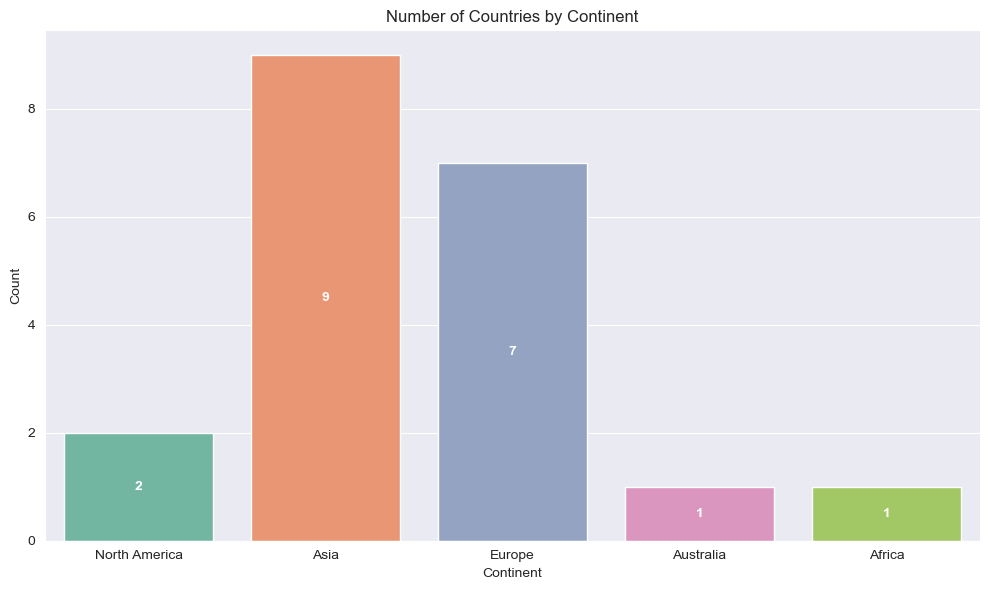

In [18]:
# use f'{int(height)} so that the nmbers display as integers
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Continent', hue='Continent', data=top20, palette='Set2', legend=False)

# Add integer counts inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.title('Number of Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Answer 1 ###
* All the continents have representation except for South America (Antactica being excluded from the analysis) 
* Asia and Europe have the most countries (9 and 7 respectively) with listed companies that have high stock market capitalization 
*  Market capitalization is widely used to assess the size of companies by looking at the total dollar market value of a company's outstanding shares of stock 

In [20]:
df1 = pd.read_csv("C:/Users/pmush/OneDrive/Desktop/Data Science Prog/webscrapping/exports.csv")

## Question 2 ##
### What are the top exports for the top 20 countries with the highest market capitalization? ###



In [34]:
# Merge the two DataFrames on the 'Country' column
df_merged = pd.merge(df, df1, on='Country', how='inner')
print(df_merged)

           Country Total market cap: (in millions of US$)  \
0    United States                             56,549,774   
2            China                             14,411,090   
4            Japan                              5,504,375   
6            India                              5,063,221   
8           Canada                              3,463,403   
..             ...                                    ...   
194        Algeria                                    371   
196       Paraguay                                    313   
198        Uruguay                                    284   
200        Armenia                                    253   
202       Eswatini                                    234   

     Total market cap: (as a % of GDP) Number of domestic companies listed  \
0                                206.7                               4,642   
2                                 65.1                               5,363   
4                                

In [48]:
#correct indexing after duplicates have been removed
df_merged = df_merged.drop_duplicates(subset=['Country']).reset_index(drop=True)
df_merged

,Country,Total market cap: (in millions of US$),Total market cap: (as a % of GDP),Number of domestic companies listed,Year_x,Exports,Year_y,Top goods export (2021)
0,United States,"56,549,774",206.7,"4,642",2025,"3,051,824",2023,Petroleum
1,China,"14,411,090",65.1,"5,363",2024,"3,511,248",2023,Broadcasting equipment
2,Japan,"5,504,375",146.2,"3,865",2024,"920,737",2023,Cars
3,India,"5,063,221",140.1,"5,451",2024,"773,223",2023,Petroleum
4,Canada,"3,463,403",160.7,"3,534",2024,"717,677",2023,Petroleum
...,...,...,...,...,...,...,...,...
97,Algeria,371,0.2,...,2018,"68,664",2022,Petroleum
98,Paraguay,313,3.5,55,1999,"14,970",2022,Soybeans
99,Uruguay,284,1.4,17,1996,"22,605",2022,Beef
100,Armenia,253,1.3,12,2022,"9,699",2022,Copper


In [52]:
#subset to have country and exports columns from different dataframes
country_exports = df_merged.loc[0 : 19, ['Country', 'Top goods export (2021)']]  # Rows 0 to 19, columns Country and top goods exports
print(country_exports)

                 Country Top goods export (2021)
0          United States               Petroleum
1                  China  Broadcasting equipment
2                  Japan                    Cars
3                  India               Petroleum
4                 Canada               Petroleum
5                 France    Packaged medications
6         United Kingdom                    Gold
7           Saudi Arabia               Petroleum
8                Germany                    Cars
9                 Taiwan     Integrated circuits
10             Australia                Iron ore
11           Netherlands               Petroleum
12           South Korea     Integrated circuits
13           Switzerland                    Gold
14                  Iran                 Plastic
15                 Spain                    Cars
16          South Africa                Platinum
17                Sweden                    Cars
18  United Arab Emirates               Petroleum
19                Br

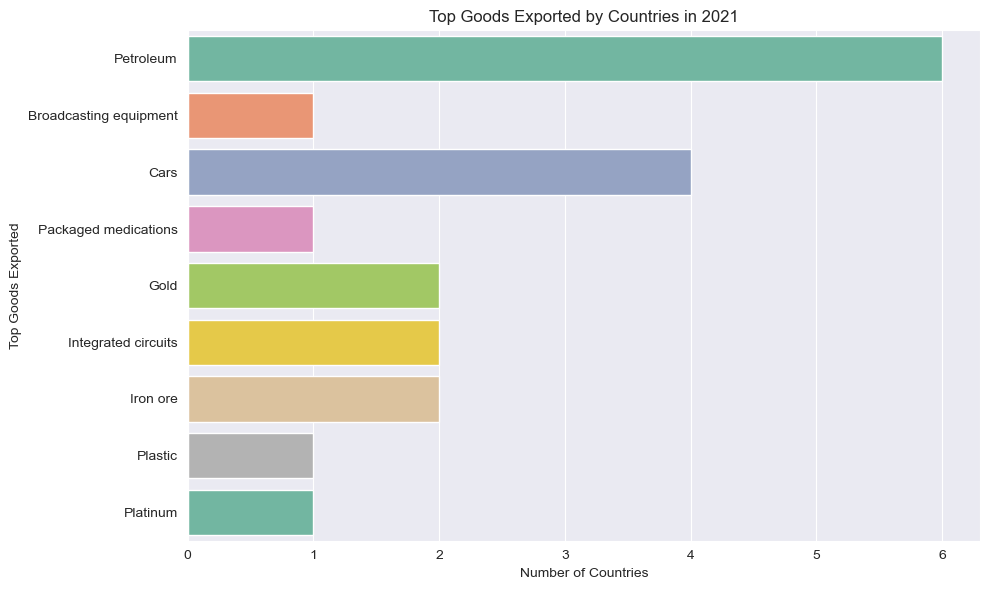

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='Top goods export (2021)',
    data=country_exports,
    hue='Top goods export (2021)',  # assign hue
    palette='Set2',
    legend=False  # turn off the extra legend since y-axis already shows labels
)

# Set labels and title
plt.xlabel('Number of Countries')
plt.ylabel('Top Goods Exported')
plt.title('Top Goods Exported by Countries in 2021')

plt.tight_layout()
plt.show()


### Answer 2  ###
* The top exports for the countries with the largest market capitalization include petrolium cars, gold, integrated circuits and iron ore
* these are common top exports for at lease 2 countries
* The commodities exported by the most countries are petrolium (6 countries) and cars (4 countries)

### References ###
merging using a common colum: ChatGPT, response to “how to merge two dataframes,” April 10, 2025, ChatGPT, https://chatgpt.com/
using drop_duplicates and reset_index: ChatGPT, response to “removing duplicates and correcting indexing,” April 12, 2025, ChatGPT, https://chatgpt.com/